In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import plotly.express as px
from matplotlib.pyplot import figure
import numpy as np

In [ ]:
recipes_df = pd.read_csv('https://tinyurl.com/2n9aspp8')

**Pre** **Processing** **the** **data**

In [ ]:
# Regularize the cuisines to be the 
recipes_df.Country.replace({'Vietnam': 'Vietnamese', 'India': 'Indian', 'Spanish_Portuguese': 'Portuguese',
           'Portugal': 'Portuguese', 'France': 'French', 'Thailand': 'Thai', 'Thailand': 'Thai',
           'Scandinavia': 'Scandinavian', 'Mexico': 'Mexican','mexico': 'Mexican', 'China': 'Chinese', 'Germany': 'German',
           'Japan': 'Japanese', 'English_Scottish': 'Scottish', 'Asia': 'Asian', 'east_asian': 'East_Asian', 
            'Canada': 'Canadian', 'Turkey': 'Turkish', 'Bangladesh': 'Bangladeshi', 'Italy': 'Italian', 
            'Israel': 'Israeli', 'Korea': 'Korean', 'Iran': 'Iranian', "Eastern-Europe": "Eastern_Europe", 
            "UK-and-Ireland": "UK_Ireland", 'Spain': 'Spanish', 'Netherlands': 'Dutch', 'Philippines': 'Filipino',
            'Indonesia': 'Indonesian', 'Switzerland': 'Swiss', 'Lebanon': 'Lebanese', 'Malaysia': 'Malaysian',
            'Austria': 'Austrian', 'East-african': 'African', 'West-african': 'African', 'South-african': 'African', 
            'North-african': 'African', 'Middleeastern':'Middle-Eastern', 'Middle-eastern': 'Middle-Eastern',
            'Easterneuropean_russian': 'Eastern_european', 'Eastern_europe': 'Eastern_european'}, inplace=True)


In [ ]:
recipes_df.Country = recipes_df.Country.str.capitalize()

In [ ]:
recipes_df.columns = recipes_df.columns.str.capitalize()

In [ ]:
recipes_df.rename(columns={'Country':'Cuisine'}, inplace=True)

In [ ]:
recipes_df.shape

(57691, 384)

In [ ]:
# To get and drop all receipes with count less than 50
recipes_counts = recipes_df['Cuisine'].value_counts()  
cuisines_indices = recipes_counts > 50

cuisines_to_keep = list(np.array(recipes_counts.index.values)[np.array(cuisines_indices)])

new_recipes = recipes_df.loc[recipes_df['Cuisine'].isin(cuisines_to_keep)]  # Dataframe of recipes with count more than 50

In [ ]:
new_recipes.Cuisine.value_counts()

American                 40150
Italian                   3250
Mexican                   2390
French                    1264
Asian                     1193
East_asian                 951
Korean                     799
Canadian                   774
Indian                     598
Western                    450
Chinese                    442
Eastern_european           381
Southern_soulfood          346
Portuguese                 341
Japanese                   320
Jewish                     320
German                     289
Mediterranean              289
Thai                       289
Uk_ireland                 282
Scandinavian               250
Middle-eastern             248
Central_southamerican      241
Greek                      225
African                    215
Scottish                   204
Caribbean                  183
Cajun_creole               146
Moroccan                   137
Southwestern               108
South-america              103
Vietnamese                  95
Irish   

In [ ]:
# Checking for null values

new_recipes.isna().sum().sort_values(ascending=False)

Zucchini           0
Yogurt             0
Egg_noodle         0
Elderberry         0
Emmental_cheese    0
                  ..
Pimento            0
Pineapple          0
Pistachio          0
Plum               0
Cuisine            0
Length: 384, dtype: int64

In [ ]:
# Encoding the categorial variables

new_recipes.replace(to_replace="Yes", value=1, inplace=True)
new_recipes.replace(to_replace="No", value=0, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
# To get the top ingredients.

ingrid = new_recipes.iloc[:, 1:].sum(axis=0)
print(ingrid.sort_values(ascending=False, inplace=True))
ing = pd.DataFrame(ingrid).reset_index()
ing = ing.rename(columns=({'index': 'Ingredient', 0: 'Count'}))
ing.head()

None


,Ingredient,Count
0,Egg,21029
1,Wheat,20784
2,Butter,20723
3,Onion,18105
4,Garlic,17363


In [ ]:
# How much does each ingredient contribute to a cuisine
# For Africans, Almond represents 12.09%

cuisines = new_recipes.groupby('Cuisine').mean().head(10)
cuisines * 100

,Almond,Angelica,Anise,Anise_seed,Apple,Apple_brandy,Apricot,Armagnac,Artemisia,Artichoke,Asparagus,Avocado,Bacon,Baked_potato,Balm,Banana,Barley,Bartlett_pear,Basil,Bay,Bean,Beech,Beef,Beef_broth,Beef_liver,Beer,Beet,Bell_pepper,Bergamot,Berry,Bitter_orange,Black_bean,Black_currant,Black_mustard_seed_oil,Black_pepper,Black_raspberry,Black_sesame_seed,Black_tea,Blackberry,Blackberry_brandy,...,Sunflower_oil,Sweet_potato,Swiss_cheese,Tabasco_pepper,Tamarind,Tangerine,Tarragon,Tea,Tequila,Thai_pepper,Thyme,Tomato,Tomato_juice,Truffle,Tuna,Turkey,Turmeric,Turnip,Vanilla,Veal,Vegetable,Vegetable_oil,Vinegar,Violet,Walnut,Wasabi,Watercress,Watermelon,Wheat,Wheat_bread,Whiskey,White_bread,White_wine,Whole_grain_wheat_flour,Wine,Wood,Yam,Yeast,Yogurt,Zucchini
Cuisine,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
African,12.093023,0.000000,0.465116,0.000000,2.325581,0.000000,7.441860,0.000000,0.000000,0.000000,0.000000,0.465116,0.465116,0.000000,0.000000,1.395349,0.930233,0.000000,0.930233,5.581395,3.255814,0.0,8.837209,1.860465,0.000000,0.000000,0.465116,27.441860,0.000000,0.000000,0.000000,0.465116,0.000000,0.000000,28.837209,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.465116,4.186047,0.000000,0.465116,1.395349,0.000000,0.000000,0.000000,0.000000,0.465116,4.651163,31.162791,0.000000,0.000000,0.930233,0.465116,17.674419,2.790698,3.720930,0.000000,4.651163,21.860465,8.372093,0.000000,2.790698,0.000000,0.000000,0.000000,26.511628,0.465116,0.000000,0.930233,2.325581,0.930233,0.930233,0.000000,0.465116,2.325581,1.860465,6.046512
American,4.059776,0.002491,0.301370,0.057285,5.205479,0.062267,1.130760,0.009963,0.000000,0.635118,0.752179,0.732254,4.122042,0.019925,0.007472,2.159402,0.388543,0.042341,5.865504,2.069738,2.876712,0.0,7.511831,0.998755,0.017435,0.542964,0.368618,8.784558,0.014944,0.383562,0.124533,0.513076,0.019925,0.004981,14.762142,0.019925,0.00000,0.057285,0.346202,0.007472,...,0.002491,1.018680,1.123288,1.835616,3.377335,0.052304,0.869240,0.179328,0.176837,0.064757,5.232877,13.867995,0.321295,0.059776,0.779577,1.775841,1.466999,0.251557,19.706102,0.169365,1.930262,18.739726,13.549191,0.009963,5.995019,0.109589,0.209215,0.216687,39.840598,0.156912,0.296389,0.687422,3.080946,1.481943,1.100872,0.067248,0.144458,6.821918,1.691158,1.863014
Asian,0.754401,0.000000,0.083822,0.251467,1.257334,0.000000,0.502934,0.000000,0.000000,0.000000,1.927913,1.089690,1.341157,0.000000,0.000000,0.670578,2.933780,0.000000,5.532272,1.173512,8.382230,0.0,10.393965,1.257334,0.000000,0.419111,0.083822,13.327745,0.000000,0.083822,0.167645,1.760268,0.000000,0.167645,11.818944,0.000000,0.00000,0.586756,0.083822,0.000000,...,0.000000,1.089690,0.083822,1.005868,1.592624,0.670578,0.167645,0.670578,0.000000,4.191115,0.419111,5.783738,0.000000,0.000000,1.676446,0.670578,8.046940,0.419111,1.257334,0.083822,3.772003,36.043588,33.696563,0.000000,0.419111,2.682313,1.508801,0.167645,9.555742,0.083822,0.083822,0.167645,3.855826,0.167645,12.489522,0.000000,0.167645,0.419111,1.089690,1.173512
Cajun_creole,0.000000,0.000000,0.000000,0.000000,0.684932,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.684932,2.054795,0.000000,0.000000,0.684932,0.000000,0.000000,2.739726,23.287671,0.684932,0.0,14.383562,2.739726,0.000000,0.000000,1.369863,34.246575,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.876712,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,1.369863,0.000000,13.698630,7.534247,0.000000,1.369863,0.000000,0.000000,0.000000,32.876712,31.506849,0.000000,0.000000,0.684932,3.424658,0.000000,1.369863,4.109589,1.369863,2.739726,34.246575,21.917808,0.000000,0.000000,0.000000,2.054795,0.000000,30.821918,0.000000,0.000000,0.684932,8.219178,0.000000,19.178082,0.000000,0.684932,3.424658,0.684932,0.000000
Canadian,3.617571,0.000000,0.000000,0.000000,3.617571,0.000000,0.258398,0.000000,0.000000,0.129199,0.775194,0.904393,3.229974,0.000000,0.000000,2.067183,0.775194,0.000000,6.072351,2.842377,1.937984,0.0,8.656331

In [ ]:
# Getting the top 4 ingridents in each cuisine
def top_4_ingredients(row):
    print(row.name.upper())
    row_sorted = row.sort_values(ascending=False) * 100
    top_ingredients = list(row_sorted.index.values)[0:4]
    row_sorted = list(row_sorted)[0:4]

    for ind, ingredient in enumerate(top_ingredients):
        print("%s (%d%%)" % (ingredient, row_sorted[ind]), end=' ')
    print("\n")

# apply function to cuisines dataframe
cuisines.apply(top_4_ingredients, axis=1)

AFRICAN
Onion (56%) Garlic (45%) Olive_oil (44%) Cumin (42%) 

AMERICAN
Butter (41%) Egg (40%) Wheat (39%) Onion (29%) 

ASIAN
Soy_sauce (49%) Ginger (48%) Garlic (47%) Rice (41%) 

CAJUN_CREOLE
Onion (69%) Cayenne (56%) Garlic (48%) Butter (36%) 

CANADIAN
Wheat (39%) Butter (38%) Egg (35%) Onion (34%) 

CARIBBEAN
Onion (51%) Garlic (50%) Vegetable_oil (31%) Black_pepper (31%) 

CENTRAL_SOUTHAMERICAN
Garlic (56%) Onion (54%) Cayenne (51%) Tomato (41%) 

CHINESE
Soy_sauce (68%) Ginger (53%) Garlic (52%) Scallion (48%) 

EAST_ASIAN
Garlic (55%) Soy_sauce (50%) Scallion (49%) Cayenne (47%) 

EASTERN_EUROPEAN
Butter (52%) Wheat (51%) Egg (51%) Onion (42%) 



Cuisine
African                  None
American                 None
Asian                    None
Cajun_creole             None
Canadian                 None
Caribbean                None
Central_southamerican    None
Chinese                  None
East_asian               None
Eastern_european         None
dtype: object

In [ ]:
#Dropping a few of the american cuisines due to their number

new_recipes.Cuisine.value_counts()[:5]

American    40150
Italian      3250
Mexican      2390
French       1264
Asian        1193
Name: Cuisine, dtype: int64

In [ ]:
new_recipes.shape

(57434, 384)

In [ ]:
# Getting the indices for all receipes that are American


American_idx = new_recipes[new_recipes.Cuisine == 'American'].index
print(len(American_idx)) # Getting the index of the rows with American 

to_keep = pd.Series(American_idx).sample(n=3_250, random_state=2)  # Taking a random saple of 3,250

to_drop = set(American_idx) - set(to_keep)
to_drop = list(to_drop) # Get a list of the indices to drop

40150


In [ ]:
new_recipes.drop(to_drop, inplace=True) # Dropping the indices

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
new_recipes.reset_index(drop=True, inplace=True)  # Restting the index


In [ ]:
new_recipes.shape

(20534, 384)

In [ ]:
# Checking for any redundant columns and dropping it

to_drop2 = []

for i in new_recipes.columns[1:]:
    if new_recipes[i].sum() == 0:
        to_drop2.append(i)

print('Ingredients with no reprsentation in any recipe(s) is :', to_drop2)

new_recipes.drop(to_drop2, axis=1, inplace=True)

Ingredients with no reprsentation in any recipe(s) is : ['Angelica', 'Balm', 'Carnation', 'Durian', 'Geranium', 'Laurel', 'Lilac_flower_oil', 'Mate', 'Muscat_grape', 'Pelargonium', 'Roasted_hazelnut', 'Roasted_nut', 'Roasted_pecan', 'Smoked_fish', 'Soybean_oil']


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


#### Code to group the ingredients into categaries. 

**The EDA bit**


# Skip to **[here](#import-the-resultant-dataframe)** to import the resultant dataframe

In [ ]:
# web scraping to find out the category of each ingredient
ingr_cat = []
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.157 Safari/537.36'}
for ingr in ingrS:
    url = 'https://www.google.com/search?q={}'.format(ingr)
    r = requests.get(url, headers = headers)
    soup = BeautifulSoup(r.text)
    try:
        cat = soup.find('div', {'class':'wwUB2c PZPZlf'}).text
        ingr_cat.append([ingr, cat])
    except AttributeError:
        ingr_cat.append([ingr, 'none'])
ingr_catDF = pd.DataFrame(ingr_cat, columns=['ingredient', 'category'])

In [ ]:
# clean 'Food' category
ingr_catDF.loc[254, 'category'],ingr_catDF.loc[255, 'category'], ingr_catDF.loc[52, 'category'], ingr_catDF.loc[98, 'category'], \
ingr_catDF.loc[9, 'category'],ingr_catDF.loc[20, 'category'],ingr_catDF.loc[24, 'category'],ingr_catDF.loc[46, 'category'],\
ingr_catDF.loc[71, 'category'],ingr_catDF.loc[94, 'category'],ingr_catDF.loc[101, 'category'],ingr_catDF.loc[116, 'category'],\
ingr_catDF.loc[119, 'category'], ingr_catDF.loc[136, 'category'], ingr_catDF.loc[207, 'category'], ingr_catDF.loc[222, 'category'],\
ingr_catDF.loc[259, 'category'], ingr_catDF.loc[320, 'category'], ingr_catDF.loc[325, 'category'], ingr_catDF.loc[329, 'category'],\
ingr_catDF.loc[333, 'category'], ingr_catDF.loc[337, 'category'],ingr_catDF.loc[356, 'category'], ingr_catDF.loc[363, 'category'],\
ingr_catDF.loc[376, 'category'], ingr_catDF.loc[381, 'category']\
=\
'Plant', 'Edible oil', 'Dairy product','Beverage','Vegetable','Legume', 'Meat','Grain','Grain','Fruit','Condiment',\
'Plant','Animal produce', 'Condiment','Meat','Fruit','Fruit','Animal','Fish','Dairy product','Plant','Grain','Fungus',\
'Vegetable','Grain','Dairy product'

In [ ]:
ingr_catDF.category.replace({'Technology company':'Fruit',
                             'Software company':'Fruit',
                             '2011 ‧ Family/Comedy ‧ 1h 35m':'Plant',
                            '2021 ‧ Drama ‧ 1 season': 'Animal',
                            '2021 ‧ Drama/Crime ‧ 2h 21m': 'Fruit',
                            '2021 ‧ Horror/Fantasy ‧ 1h 46m': 'Meat',
                            'Alcoholic beverages':'Alcohol',
                            'Alcoholic beverage': 'Alcohol',
                            'Alcoholic drink':'Alcohol',
                            'American singer-songwriter': 'Alcohol',
                            'Birds':'Meat',
                            'Color':'Plant',
                            'Cheese':'Dairy product',
                            'Direct bank':'Fruit',
                            'Distilled liquor type':'Alcohol',
                            'Distilled spirit type': 'Alcohol',
                            'Fish as food' :'Fish',
                            'Flesh':'Fruit',
                            'Cereal grain':'Grain',
                            'Grains':'Grain',
                            'Grape':'Fruit',
                            'Grape variety':'Fruit',
                            'Herb':'Plant',
                            'Infusion':'Beverage',
                            'North America':'Dairy product',
                            'Personal financial management company': 'Plant',
                            'Pork':'Meat',
                            'Pseudocereal':'Plant',
                            'Roe':'Spread',
                            'Squash': 'Fruit',
                            'Summer squash':'Fruit',
                            'Video game developer':'Fruit',
                            'Video game series':'Fish',
                            'Website':'Plant',
                            'Algae':'Plant',
                            'Sweetener': 'Condiment',
                            'Sausage':'Meat',
                            'Smoked fish':'Fish',
                            'Pasta':'Grain',
                            'Breakfast cereal':'Grain',
                            'Animal fat':'Animal produce'}, inplace =True)

In [ ]:
# clean 'none' category
ingr_catDF.loc[3, 'category'],ingr_catDF.loc[5, 'category'], ingr_catDF.loc[7, 'category'], ingr_catDF.loc[12, 'category'],\
ingr_catDF.loc[14, 'category'], ingr_catDF.loc[19, 'category'], ingr_catDF.loc[33, 'category'], ingr_catDF.loc[36, 'category'],\
ingr_catDF.loc[37, 'category'], ingr_catDF.loc[39, 'category'], ingr_catDF.loc[40, 'category'], ingr_catDF.loc[42, 'category'],\
ingr_catDF.loc[51, 'category'], ingr_catDF.loc[54, 'category'], ingr_catDF.loc[57, 'category'], ingr_catDF.loc[59, 'category'],\
ingr_catDF.loc[62, 'category'], ingr_catDF.loc[68, 'category'], ingr_catDF.loc[70, 'category'], ingr_catDF.loc[73, 'category'],\
ingr_catDF.loc[75, 'category'], ingr_catDF.loc[78, 'category'], ingr_catDF.loc[82, 'category'], ingr_catDF.loc[91, 'category'],\
ingr_catDF.loc[95, 'category'],ingr_catDF.loc[103, 'category'], ingr_catDF.loc[106, 'category'], ingr_catDF.loc[110, 'category'],\
ingr_catDF.loc[113, 'category'], ingr_catDF.loc[115, 'category'], ingr_catDF.loc[122, 'category'], ingr_catDF.loc[129, 'category'],\
ingr_catDF.loc[130, 'category'], ingr_catDF.loc[132, 'category'],ingr_catDF.loc[133, 'category'],ingr_catDF.loc[140, 'category'],\
ingr_catDF.loc[142, 'category'], ingr_catDF.loc[143, 'category'],ingr_catDF.loc[146, 'category'], ingr_catDF.loc[147, 'category'],\
ingr_catDF.loc[158, 'category'],ingr_catDF.loc[159, 'category'], ingr_catDF.loc[161, 'category'], ingr_catDF.loc[162, 'category'],\
ingr_catDF.loc[167, 'category'], ingr_catDF.loc[175, 'category'], ingr_catDF.loc[184, 'category'], ingr_catDF.loc[185, 'category'],\
ingr_catDF.loc[187, 'category'], ingr_catDF.loc[188, 'category'], ingr_catDF.loc[191, 'category'], ingr_catDF.loc[197, 'category'],\
ingr_catDF.loc[200, 'category'], ingr_catDF.loc[201, 'category'], ingr_catDF.loc[203, 'category'], ingr_catDF.loc[210, 'category'],\
ingr_catDF.loc[213, 'category'], ingr_catDF.loc[214, 'category'], ingr_catDF.loc[221, 'category'], ingr_catDF.loc[225, 'category'],\
ingr_catDF.loc[229, 'category'], ingr_catDF.loc[232, 'category'], ingr_catDF.loc[234, 'category'], ingr_catDF.loc[236, 'category'],\
ingr_catDF.loc[243, 'category'], ingr_catDF.loc[248, 'category'], ingr_catDF.loc[250, 'category'], ingr_catDF.loc[257, 'category'],\
ingr_catDF.loc[261, 'category'], ingr_catDF.loc[264, 'category'], ingr_catDF.loc[265, 'category'], ingr_catDF.loc[266, 'category'],\
ingr_catDF.loc[278, 'category'], ingr_catDF.loc[279, 'category'], ingr_catDF.loc[280, 'category'], ingr_catDF.loc[281, 'category'],\
ingr_catDF.loc[282, 'category'], ingr_catDF.loc[285, 'category'], ingr_catDF.loc[287, 'category'], ingr_catDF.loc[288, 'category'],\
ingr_catDF.loc[289, 'category'], ingr_catDF.loc[290, 'category'], ingr_catDF.loc[291, 'category'], ingr_catDF.loc[292, 'category'],\
ingr_catDF.loc[293, 'category'], ingr_catDF.loc[294, 'category'], ingr_catDF.loc[295, 'category'], ingr_catDF.loc[304, 'category'],\
ingr_catDF.loc[307, 'category'], ingr_catDF.loc[309, 'category'], ingr_catDF.loc[313, 'category'], ingr_catDF.loc[315, 'category'],\
ingr_catDF.loc[314, 'category'], ingr_catDF.loc[317, 'category'], ingr_catDF.loc[319, 'category'], ingr_catDF.loc[321, 'category'],\
ingr_catDF.loc[327, 'category'], ingr_catDF.loc[332, 'category'], ingr_catDF.loc[339, 'category'], ingr_catDF.loc[340, 'category'],\
ingr_catDF.loc[343, 'category'], ingr_catDF.loc[354, 'category'], ingr_catDF.loc[334, 'category'], ingr_catDF.loc[355, 'category'],\
ingr_catDF.loc[358, 'category'], ingr_catDF.loc[361, 'category'], ingr_catDF.loc[362, 'category'], ingr_catDF.loc[364, 'category'],\
ingr_catDF.loc[375, 'category'], ingr_catDF.loc[286, 'category'], ingr_catDF.loc[372, 'category'], ingr_catDF.loc[374, 'category'],\
ingr_catDF.loc[301, 'category'], ingr_catDF.loc[371, 'category'], ingr_catDF.loc[253, 'category'], ingr_catDF.loc[34, 'category'],\
ingr_catDF.loc[27, 'category']\
=\
'Plant', 'Alcohol', 'Alcohol', 'Meat', 'Plant', 'Plant', 'Edible oil', 'Plant', 'Beverage','Alcohol','Dairy product', 'Edible oil',\
'Spread', 'Alcohol', 'Condiment', 'Spice', 'Fruit', 'Spice', 'Edible oil', 'Alcohol', 'Dairy product', 'Alcohol', 'Animal produce',\
'Fruit', 'Fruit', 'Grain', 'Dairy product', 'Dairy product', 'Meat', 'Fruit', 'Dairy product', 'Fish','Plant', 'Fruit', 'Spice',\
'Dairy product', 'Alcohol', 'Fruit', 'Beverage', 'Dairy product', 'Alcohol', 'Fruit', 'Beverage', 'Fruit','Legume', 'Plant',\
'Edible oil', 'Legume', 'Fruit', 'Edible oil', 'Animal produce','Spice', 'Fruit', 'Fruit', 'Condiment', 'Dairy product', 'Legume',\
'Dairy product', 'Vegetable', 'Grain', 'Edible oil', 'Plant', 'Fruit', 'Alcohol', 'Fruit', 'Edible oil', 'Alcohol', 'Spice', 'Grain',\
'Animal produce', 'Meat', 'Alcohol', 'Meat', 'Plant', 'Legume', 'Legume', 'Alcohol', 'Plant', 'Fruit', 'Meat', 'Fruit', 'Legume',\
'Plant', 'Meat', 'Plant', 'Dairy product', 'Plant', 'Plant', 'Animal produce', 'Vegetable', 'Plant', 'Plant', 'Plant', 'Plant',\
'Dairy product', 'Alcohol', 'Meat', 'Edible oil', 'Spread', 'Fruit', 'Edible oil', 'Fruit', 'Plant', 'Fruit', 'Meat', 'Spice', 'Meat',\
'Edible oil', 'Alcohol', 'Meat', 'Grain', 'Grain', 'Grain','Grain','Spice', 'Spice','Spice'

In [ ]:
ingr_catDF.category.replace({'none':'Others',
                             'Food' : 'Others',
                             'Dish': 'Others'},
                            inplace = True)

## import the resultant dataframe

In [ ]:
ingr_catDF = pd.read_csv('https://raw.githubusercontent.com/adedam0/Hamoye/main/datasets/cuisine/ingredient%20category.csv')

### run following cells till you see the word "Skip"

#### Group the countries into continents

In [ ]:
continent = pd.DataFrame([
    ['Austrian', 'Europe'],['Malaysian', 'Asia'],['Lebanese', 'Asia'],['Pakistan', 'Asia'],['Swiss', 'Europe'],
    ['Indonesian', 'Asia'],['Filipino', 'Asia'],['Dutch', 'Europe'],['Spanish', 'Europe'],['South-america', 'South America'],
    ['Belgium', 'Europe'],['Uk_ireland', 'Europe'],['Eastern_europe', 'Europe'],['Iranian', 'Asia'],['Israeli', 'Europe'],
    ['Bangladeshi', 'Asia'],['Caribbean', 'North America'],['Turkish', 'Europe'],['Canadian', 'North America'],['Korean', 'Asia'],
    ['Western', 'Europe'],['East_asian', 'Asia'],['Southwestern', 'North America'],['Asian', 'Asia'],['Scottish', 'Europe'],
    ['Southern_soulfood', 'North America'],['Moroccan', 'Africa'],['Japanese', 'Asia'],['Mediterranean', 'Europe'],
    ['German', 'Europe'],['Chinese', 'Asia'],['Mexican', 'North America'],['Irish', 'Europe'],['Italian', 'Europe'],
    ['Easterneuropean_russian', 'Europe'],['Middle Eastern', 'Africa'],['Vietnamese', 'Asia'],['Indian', 'Asia'],
    ['Portuguese', 'Europe'],['Jewish', 'Europe'],['French', 'Europe'],['Central_southamerican', 'South America'],
    ['Thai', 'Asia'],['Scandinavian', 'Europe'],['Greek', 'Europe'],['American', 'North America'],['African', 'Africa'],
    ['Cajun_creole', 'North America']
], columns = ['Cuisine', 'Continent'])

In [ ]:
refined_df = pd.merge(new_recipes, continent, on = ['Cuisine'])


no. of recipes for each country:

In [ ]:
cont_C = dict(refined_df['Continent'].value_counts())
cont_C

{'Africa': 352,
 'Asia': 4687,
 'Europe': 7325,
 'North America': 7197,
 'South America': 344}

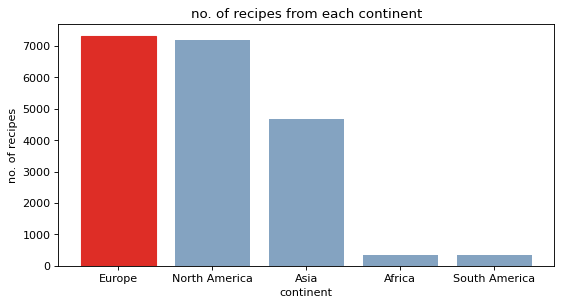

In [ ]:
figure(figsize=(8, 4), dpi=80)
b = plt.bar(cont_C.keys(), cont_C.values(),color=(0.2, 0.4, 0.6, 0.6))
b[0].set_color('#de2d26')
plt.xlabel('continent')
plt.ylabel('no. of recipes')
plt.title('no. of recipes from each continent')
plt.show()

- Most of our recipes are North American. 
- If we desire to know where certain ingredients are mostly used, using ingredient count per country will be suboptimal as North America will likely dominate most of the ingredients
- A better metric will be to calculate the no. of times an ingredient is used per dish for every continent

We desire to create a table like

| continent      | ingredient | prevalence |
| ----------- | ----------- | ----------- |
| Asia      | Egg       | 0.45 |
| Africa   | Okra        | 0.1 |

where **prevalence** = no. of times the ingredient is used per recipe for each continent



To create the dataframe, we start by creating a dictionary where
**ih = {('continent', 'ingredient'): no. of occurences}**

# Skip to **[here](#import-here)** to import the resultant dataframe

In [ ]:
ih = {}
for i in refined_df.index:
    row = pd.DataFrame(refined_df.loc[i]).T
    ings = list(row.columns[row.eq('Yes').any()])
    continent = refined_df.loc[i, 'Continent']
    for ing in ings:
        try:
            ih[(continent, ing)] += 1
        except KeyError:
            ih[(continent, ing)] = 1
qq = []
for key in ih.keys():
    continent = key[0]
    ingredient = key[1]
    ingr_count = ih[key]
    recipe_count = cont_C[key[0]]
    qq.append([continent, ingredient, ingr_count/recipe_count, ingr_count])
df99 = pd.DataFrame(qq, columns = ['continent', 'ingredient', 'prevalence', 'count'])

## import here

In [ ]:
df99 = pd.read_csv('https://raw.githubusercontent.com/adedam0/Hamoye/main/datasets/cuisine/continent%20and%20ingredient%20prevalence.csv')

### run the remaining cells

#### North America showing its dominance.

In [ ]:
sunDF1 = pd.merge(df99, ingr_catDF, on = ['ingredient'])
fig = px.sunburst(sunDF1, path = ['continent', 'category', 'ingredient'], values='count', color='continent',
                  color_discrete_map={'Asia':'lightgray', 'Africa':'#f1a340', 'South America':'#998ec3', 'Europe':'pink',
                                      'North America': '#66c2a5'}, title = 'Ingredient count in all recipes from each continent')
fig.show()

#### Neutralise North America's dominance

In [ ]:
sunDF2 = pd.merge(df99, ingr_catDF, on = ['ingredient'])
fig = px.sunburst(sunDF2, path=['continent', 'category', 'ingredient'], values = 'prevalence', color='continent',
                  color_discrete_map={'Asia':'lightgray', 'Africa':'#f1a340', 'South America':'#998ec3', 'Europe':'pink',
                                      'North America': '#66c2a5'}, title = 'Ingredient count per recipe for each continent')
fig.show()

#### Notably, every dish contains about 8 ingredients.

In [ ]:
avgI = sunDF2.groupby('continent')[['prevalence']].sum().reset_index()

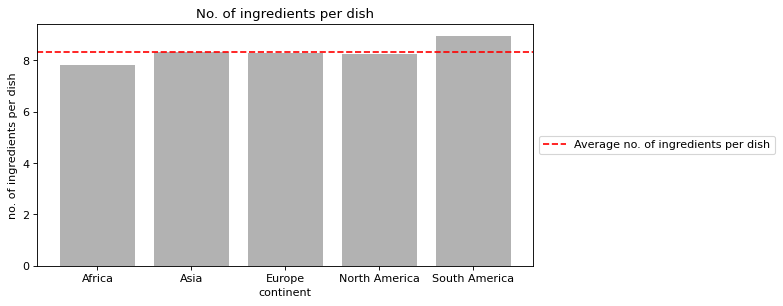

In [ ]:
figure(figsize=(8, 4), dpi=80)
plt.bar(data = avgI, x ='continent', height='prevalence',color=(0.5, 0.5, 0.5, 0.6))
plt.axhline(avgI.prevalence.mean() ,color='r',  ls='--',  label='Average no. of ingredients per dish')
plt.xlabel('continent')
plt.ylabel('no. of ingredients per dish')
plt.title('No. of ingredients per dish')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

**Creating and running the ML Models**

In [ ]:
# Creating the Features and Target

y = refined_df.Cuisine
x = refined_df.drop(['Cuisine', 'Continent'], axis=1)

In [ ]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# Creating an instance of the RandomOverSampler class to be used to oversample the minority classes.
oversampler = RandomOverSampler(random_state=0)

In [ ]:
X_over, y_over = oversampler.fit_resample(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [ ]:
print('Before oversampling: \n', Counter(y))

Before oversampling: 
 Counter({'American': 3250, 'Italian': 3250, 'Mexican': 2390, 'French': 1264, 'Asian': 1193, 'East_asian': 951, 'Korean': 799, 'Canadian': 774, 'Indian': 598, 'Western': 450, 'Chinese': 442, 'Southern_soulfood': 346, 'Portuguese': 341, 'Jewish': 320, 'Japanese': 320, 'Thai': 289, 'German': 289, 'Mediterranean': 289, 'Uk_ireland': 282, 'Scandinavian': 250, 'Central_southamerican': 241, 'Greek': 225, 'African': 215, 'Scottish': 204, 'Caribbean': 183, 'Cajun_creole': 146, 'Moroccan': 137, 'Southwestern': 108, 'South-america': 103, 'Vietnamese': 95, 'Irish': 86, 'Spanish': 75})


In [ ]:
print('After oversampling: \n', Counter(y_over))

After oversampling: 
 Counter({'Vietnamese': 3250, 'Indian': 3250, 'Portuguese': 3250, 'Jewish': 3250, 'French': 3250, 'Central_southamerican': 3250, 'Cajun_creole': 3250, 'Thai': 3250, 'Scandinavian': 3250, 'Greek': 3250, 'American': 3250, 'African': 3250, 'Italian': 3250, 'Irish': 3250, 'Mexican': 3250, 'Chinese': 3250, 'German': 3250, 'Mediterranean': 3250, 'Japanese': 3250, 'Moroccan': 3250, 'Southern_soulfood': 3250, 'Scottish': 3250, 'Asian': 3250, 'Southwestern': 3250, 'East_asian': 3250, 'Western': 3250, 'Korean': 3250, 'Canadian': 3250, 'Caribbean': 3250, 'Uk_ireland': 3250, 'South-america': 3250, 'Spanish': 3250})


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [ ]:
# Creating the trianing set and test set

X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=10)

In [ ]:
df_encoded = refined_df.copy()

new_dic = dict(zip(refined_df.Cuisine.unique(), range(len(refined_df.Cuisine.unique()))))
for i in refined_df.Cuisine.unique():
  df_encoded.replace(to_replace=i, value=new_dic.get(i), inplace=True)

df_encoded.Cuisine.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [ ]:
y_r = df_encoded.Cuisine
x_r = df_encoded.drop('Cuisine', axis=1)

In [ ]:
print(Counter(y_r))
x_rover, y_rover = oversampler.fit_resample(x_r, y_r)

print(Counter(y_rover))

Counter({10: 3250, 12: 3250, 14: 2390, 4: 1264, 22: 1193, 24: 951, 26: 799, 27: 774, 1: 598, 25: 450, 15: 442, 20: 346, 2: 341, 3: 320, 18: 320, 7: 289, 16: 289, 17: 289, 29: 282, 8: 250, 5: 241, 9: 225, 11: 215, 21: 204, 28: 183, 6: 146, 19: 137, 23: 108, 30: 103, 0: 95, 13: 86, 31: 75})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Counter({0: 3250, 1: 3250, 2: 3250, 3: 3250, 4: 3250, 5: 3250, 6: 3250, 7: 3250, 8: 3250, 9: 3250, 10: 3250, 11: 3250, 12: 3250, 13: 3250, 14: 3250, 15: 3250, 16: 3250, 17: 3250, 18: 3250, 19: 3250, 20: 3250, 21: 3250, 22: 3250, 23: 3250, 24: 3250, 25: 3250, 26: 3250, 27: 3250, 28: 3250, 29: 3250, 30: 3250, 31: 3250})


In [ ]:
X_rtrain, X_rtest, y_rtrain, y_rtest = train_test_split(x_rover, y_rover, test_size=0.2, random_state=1)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
# Creating the instance of the ExtraTreesClassifer

xt = ExtraTreesClassifier(n_estimators=200, criterion='gini', random_state=5)

In [ ]:
y_rtrain

array([ 0, 17, 14, ..., 10, 22, 30])

In [ ]:
xt.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=200,
                     n_jobs=None, oob_score=False, random_state=5, verbose=0,
                     warm_start=False)

In [ ]:
y_xtpred = xt.predict(X_test)
y_txtpred = xt.predict(X_train)

In [ ]:
print('%s %.2f%%' % ('Test set:', accuracy_score(y_xtpred, y_test) * 100 ))
print('%s %.2f%%' % ('Training set:', accuracy_score(y_txtpred, y_train) * 100))

Test set: 88.56%
Training set: 92.92%


In [ ]:
print('% s %.3f' % ('f1_score is:', f1_score(y_xtpred, y_test, average='weighted')))

f1_score is: 0.890


In [ ]:
print('%s %.3f' % ('Precision score is:', precision_score(y_xtpred, y_test, average='weighted')))

Precision score is: 0.899


In [ ]:
print('%s %.3f' % ('Recall score is:', recall_score(y_xtpred, y_test, average='weighted')))

Recall score is: 0.886
